In [187]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from google.cloud import bigquery
from google.oauth2 import service_account


credentials = service_account.Credentials.from_service_account_file(
'path/to/file.json')

project_id = 'my-bq'
client = bigquery.Client(credentials= credentials,project=project_id)


In [58]:
titanic_df = pd.read_csv('titanic.csv')

In [59]:
titanic_df.head()

,HomePlanet,CryoSleep,Deck,RoomNum,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B,0.0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F,0.0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A,0.0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A,0.0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F,1.0,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [159]:
titanic_df.dropna(inplace=True)

In [160]:
titanic_df.isnull().sum()

HomePlanet      0
CryoSleep       0
Deck            0
RoomNum         0
Side            0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [161]:
titanic_df.describe()

,HomePlanet,CryoSleep,Deck,RoomNum,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,7441.000000,7441.000000,7441.000000,7441.000000,7441.000000,7441.000000,7441.000000,7441.000000,7441.000000,7441.000000,7441.000000,7441.000000,7441.000000,7441.000000
mean,0.721408,0.391480,4.291493,601.968956,0.506652,1.514716,28.889665,0.070824,224.073646,472.297541,175.181830,312.626394,301.040989,0.502486
std,0.864742,0.536644,1.784519,513.590045,0.499989,0.840558,14.506480,0.336745,647.970462,1652.026891,616.276688,1136.403973,1114.108811,0.500027
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,168.000000,0.000000,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,5.000000,428.000000,1.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,6.000000,1000.000000,1.000000,2.000000,38.000000,0.000000,51.000000,82.000000,28.000000,64.000000,49.000000,1.000000
max,3.000000,2.000000,7.000000,1894.000000,1.000000,3.000000,79.000000,2.000000,9920.000000,29813.000000,23492.000000,22408.000000,20336.000000,1.000000


In [162]:
correlation_matrix = titanic_df.corr()
correlation_matrix

,HomePlanet,CryoSleep,Deck,RoomNum,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
HomePlanet,1.000000,0.067062,-0.368411,-0.175284,-0.000842,0.045860,0.125589,0.042842,0.197312,0.057385,0.087107,0.045385,0.037007,0.100296
CryoSleep,0.067062,1.000000,0.019071,-0.031406,0.010581,-0.088607,-0.068675,-0.024031,-0.223281,-0.181514,-0.185745,-0.176135,-0.179866,0.399343
Deck,-0.368411,0.019071,1.000000,0.534435,-0.038704,0.180609,-0.259396,-0.068580,-0.026603,-0.330786,-0.035682,-0.231208,-0.261022,-0.113408
RoomNum,-0.175284,-0.031406,0.534435,1.000000,-0.040404,0.093872,-0.137442,-0.028514,-0.010683,-0.187520,0.004759,-0.133980,-0.141115,-0.047472
Side,-0.000842,0.010581,-0.038704,-0.040404,1.000000,-0.005590,0.010191,0.004785,-0.015986,0.019208,-0.020090,0.006379,-0.003669,0.109473
Destination,0.045860,-0.088607,0.180609,0.093872,-0.005590,1.000000,-0.006508,-0.025288,0.048159,-0.109192,0.020245,-0.054563,-0.070879,-0.116251
Age,0.125589,-0.068675,-0.259396,-0.137442,0.010191,-0.006508,1.000000,0.031563,0.068830,0.131386,0.033366,0.124478,0.103945,-0.079427
VIP,0.042842,-0.024031,-0.068580,-0.028514,0.004785,-0.025288,0.031563,1.000000,0.020326,0.061358,-0.017164,0.023390,0.057782,-0.012620
RoomService,0.197312,-0.223281,-0.026603,-0.010683,-0.015986,0.048159,0.068830,0.020326,1.000000,-0.018225,0.054981,0.015399,-0.019885,-0.248122
FoodCourt,0.057385,-0.181514,-0.330786,-0.187520,0.019208,-0.109192,0.131386,0.061358,-0.018225,1.000000,-0.012871,0.217846,0.219790,0.053286


In [163]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7441 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    7441 non-null   int64  
 1   CryoSleep     7441 non-null   int64  
 2   Deck          7441 non-null   int64  
 3   RoomNum       7441 non-null   float64
 4   Side          7441 non-null   int64  
 5   Destination   7441 non-null   int64  
 6   Age           7441 non-null   float64
 7   VIP           7441 non-null   int64  
 8   RoomService   7441 non-null   float64
 9   FoodCourt     7441 non-null   float64
 10  ShoppingMall  7441 non-null   float64
 11  Spa           7441 non-null   float64
 12  VRDeck        7441 non-null   float64
 13  Transported   7441 non-null   int64  
dtypes: float64(7), int64(7)
memory usage: 872.0 KB


In [164]:
pd.get_dummies(titanic_df[['Transported', 'HomePlanet', 'Destination', 'VIP', 'CryoSleep', 'Side', 'Deck']])

,Transported,HomePlanet,Destination,VIP,CryoSleep,Side,Deck
0,0,1,2,0,0,0,1
1,1,0,2,0,0,1,5
2,0,1,2,1,0,1,0
3,0,1,2,0,0,1,0
4,1,0,2,0,0,1,5
...,...,...,...,...,...,...,...
8688,0,1,0,1,0,0,0
8689,0,0,1,0,1,1,6
8690,1,0,2,0,0,1,6
8691,0,1,0,0,0,1,4


In [165]:
titanic_df

,HomePlanet,CryoSleep,Deck,RoomNum,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,1,0.0,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,5,0.0,1,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,0,0.0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,0,0.0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,5,1.0,1,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,98.0,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,0,1,6,1499.0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,0,0,6,1500.0,1,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,1,0,4,608.0,1,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


In [166]:
titanic_df.isnull().sum()

HomePlanet      0
CryoSleep       0
Deck            0
RoomNum         0
Side            0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [167]:
titanic_df.nunique()

HomePlanet         4
CryoSleep          3
Deck               8
RoomNum         1777
Side               2
Destination        4
Age               80
VIP                3
RoomService     1185
FoodCourt       1395
ShoppingMall    1040
Spa             1232
VRDeck          1194
Transported        2
dtype: int64

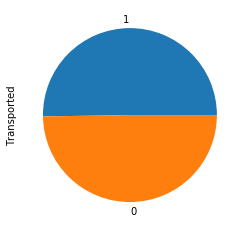

In [168]:
titanic_df['Transported'].value_counts().plot(kind='pie')

In [169]:
corr=titanic_df.corr()

In [170]:
corr

## Small amount of positive coorelation (.39) between being Transported and being in CryoSleep for the flight

,HomePlanet,CryoSleep,Deck,RoomNum,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
HomePlanet,1.000000,0.067062,-0.368411,-0.175284,-0.000842,0.045860,0.125589,0.042842,0.197312,0.057385,0.087107,0.045385,0.037007,0.100296
CryoSleep,0.067062,1.000000,0.019071,-0.031406,0.010581,-0.088607,-0.068675,-0.024031,-0.223281,-0.181514,-0.185745,-0.176135,-0.179866,0.399343
Deck,-0.368411,0.019071,1.000000,0.534435,-0.038704,0.180609,-0.259396,-0.068580,-0.026603,-0.330786,-0.035682,-0.231208,-0.261022,-0.113408
RoomNum,-0.175284,-0.031406,0.534435,1.000000,-0.040404,0.093872,-0.137442,-0.028514,-0.010683,-0.187520,0.004759,-0.133980,-0.141115,-0.047472
Side,-0.000842,0.010581,-0.038704,-0.040404,1.000000,-0.005590,0.010191,0.004785,-0.015986,0.019208,-0.020090,0.006379,-0.003669,0.109473
Destination,0.045860,-0.088607,0.180609,0.093872,-0.005590,1.000000,-0.006508,-0.025288,0.048159,-0.109192,0.020245,-0.054563,-0.070879,-0.116251
Age,0.125589,-0.068675,-0.259396,-0.137442,0.010191,-0.006508,1.000000,0.031563,0.068830,0.131386,0.033366,0.124478,0.103945,-0.079427
VIP,0.042842,-0.024031,-0.068580,-0.028514,0.004785,-0.025288,0.031563,1.000000,0.020326,0.061358,-0.017164,0.023390,0.057782,-0.012620
RoomService,0.197312,-0.223281,-0.026603,-0.010683,-0.015986,0.048159,0.068830,0.020326,1.000000,-0.018225,0.054981,0.015399,-0.019885,-0.248122
FoodCourt,0.057385,-0.181514,-0.330786,-0.187520,0.019208,-0.109192,0.131386,0.061358,-0.018225,1.000000,-0.012871,0.217846,0.219790,0.053286


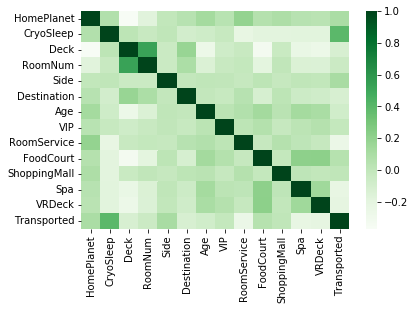

In [171]:
sns.heatmap(corr, cmap='Greens')

In [172]:
# Start Logistic Regression model

y = titanic_df["Transported"]
X = titanic_df.drop(columns="Transported")

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=42, 
                                                    stratify=y)
X_train.shape

(5580, 13)

In [179]:
classifier = LogisticRegression(random_state=1)
classifier

LogisticRegression(random_state=1)

In [181]:
lr_model = classifier.fit(X_train, y_train)

/Users/ginaleonardi/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [183]:
training_predictions = lr_model.predict(X_train)

testing_predictions = lr_model.predict(X_test)

In [184]:
 # Import the model for sklearn confusion matrix
from sklearn.metrics import confusion_matrix

# Create and save the confusion matrix for the training data
training_matrix = confusion_matrix(y_train, training_predictions)

# Print the confusion matrix for the training data
print(training_matrix)

[[2081  695]
 [ 486 2318]]


In [185]:
 # Create and save the confusion matrix for the testing data
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data
print(test_matrix)

[[686 240]
 [160 775]]


In [188]:
 # Create and save the training classification report
training_report = classification_report(y_train, training_predictions)

# Print the training classification report
print(training_report)

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      2776
           1       0.77      0.83      0.80      2804

    accuracy                           0.79      5580
   macro avg       0.79      0.79      0.79      5580
weighted avg       0.79      0.79      0.79      5580



In [189]:
 # Create and save the testing classification report
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print(testing_report)

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       926
           1       0.76      0.83      0.79       935

    accuracy                           0.79      1861
   macro avg       0.79      0.78      0.78      1861
weighted avg       0.79      0.79      0.78      1861

